In [1]:
#IMPORTS
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector

In [5]:
#Try the generalized rotations and see what they do, use the bloch sphere for visualization

In [8]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0);

# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0);

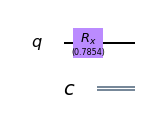

In [9]:
#RX (not) GATE ACTING ON |0>
rx_gate = QuantumCircuit(1,1) #make a QC with 1 quantum bit and 1 classical bit

rx_gate.rx(3.14159/4,0) #rotate 0 to by pi/4 around x axis

#rx_gate.measure(0,0) #measure the 0th qbit and map to the 0th classical bit

rx_gate.draw(output='mpl') #draw the circuit

In [10]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(rx_gate+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )

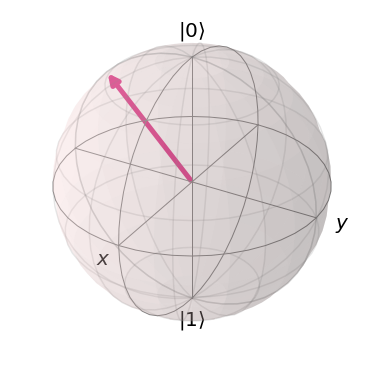

In [11]:
plot_bloch_vector( bloch_vector )

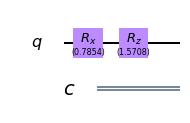

In [17]:
# and RZ RX (not) GATE ACTING ON  |0>
rxz_gate = QuantumCircuit(1,1) #make a QC with 1 quantum bit and 1 classical bit

rxz_gate.rx(3.14159/4,0) #rotate 0 to by pi/4 around x axis
rxz_gate.rz(3.14159/2,0) #rotate 0 to by pi/2 around z axis

#rx_gate.measure(0,0) #measure the 0th qbit and map to the 0th classical bit

rxz_gate.draw(output='mpl') #draw the circuit

In [18]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(rxz_gate+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )

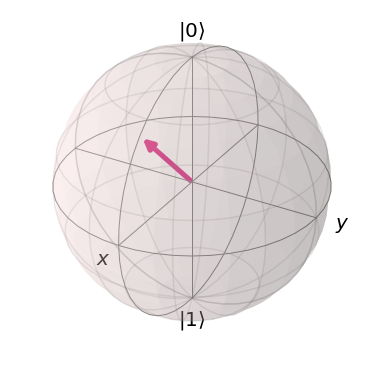

In [19]:
plot_bloch_vector( bloch_vector )

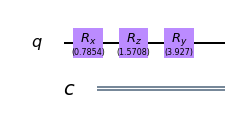

In [16]:
# and RY RZ RX (not) GATE ACTING ON  |0>
rxzy_gate = QuantumCircuit(1,1) #make a QC with 1 quantum bit and 1 classical bit

rxzy_gate.rx(3.14159/4,0) #rotate 0 to by pi/4 around x axis
rxzy_gate.rz(3.14159/2,0) #rotate 0 to by pi/2 around z axis
rxzy_gate.ry(5*3.14159/4,0) #rotate 0 to by 5pi/4 around z axis 
#rx_gate.measure(0,0) #measure the 0th qbit and map to the 0th classical bit

rxzy_gate.draw(output='mpl') #draw the circuit

In [20]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(rxzy_gate+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )

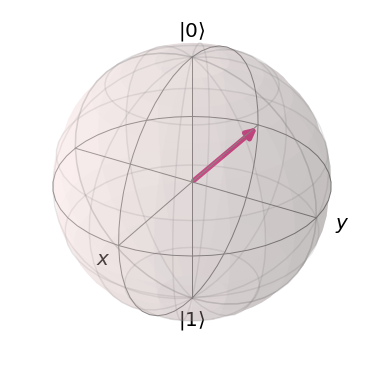

In [21]:
plot_bloch_vector( bloch_vector )